In [7]:
import time
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave

%reload_ext autoreload
%autoreload 2

from kymographs import KymoSpider

Populating the interactive namespace from numpy and matplotlib


/home/hp/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread', 'imsave', 'stack']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Loading data
_Note:_ The example below loads multiple exportet stacks and concatenates them. At the end the only variable that need to be set to something meaningful have to be `stack`, `seg`, and `flow`. The data for these variables you can generate as can be seen in `TimeLapseData2d` at the very bottom. (This was true when I wrote this text... ;)

In [13]:
#folder = '/Users/markslabodnick/Dropbox/Bobseg/Results/20170428/export/'
#folder = '/home/hp/git/BobSeg/export/z_1-50/'
folder = '/home/hp/git/BobSeg/export/'

stack1 = imread(folder+'stack01.tiff')
stack1 = np.swapaxes(stack1,0,1)
stack2 = imread(folder+'stack02.tiff')
stack2 = np.swapaxes(stack2,0,1)
stack = np.concatenate([stack1,stack2],axis=1)
stack = stack1

seg1 = imread(folder+'seg01.tiff')
seg2 = imread(folder+'seg02.tiff')
seg = np.concatenate([seg1,seg2])
seg = seg1

flow1 = imread(folder+'flow01.tiff')
flow1 = np.swapaxes(flow1,0,1)
flow2 = imread(folder+'flow02.tiff')
flow2 = np.swapaxes(flow2,0,1)
flow = np.concatenate([flow1,flow2],axis=1)
flow = flow1

# Create the KymoSpider object

In [17]:
# Parameters are: 
# -- number of legs
# -- leg length in pixels
# -- (x,y)-tuple defining the kymo spider's center point in the image
# -- optional parameter rotation in degrees (convention: make leg 1 point towards the Ea/Ep interface!)
ks = KymoSpider(8,120,(176,334),rotation=160)

### Check if the created spider is placed sinsibly
_Note:_ you will be shown the first and the last loaded frame AND the whole thing will only work if the spider does fit within the image entirely!

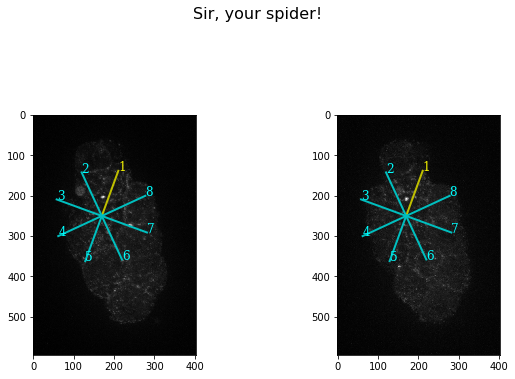

In [18]:
pylab.rcParams['figure.figsize'] = (10, 15)
fig = plt.figure()
ks.plot_spider_loc_on_images(fig,stack[0],flow)

# Compute Kymographs and Plot Data

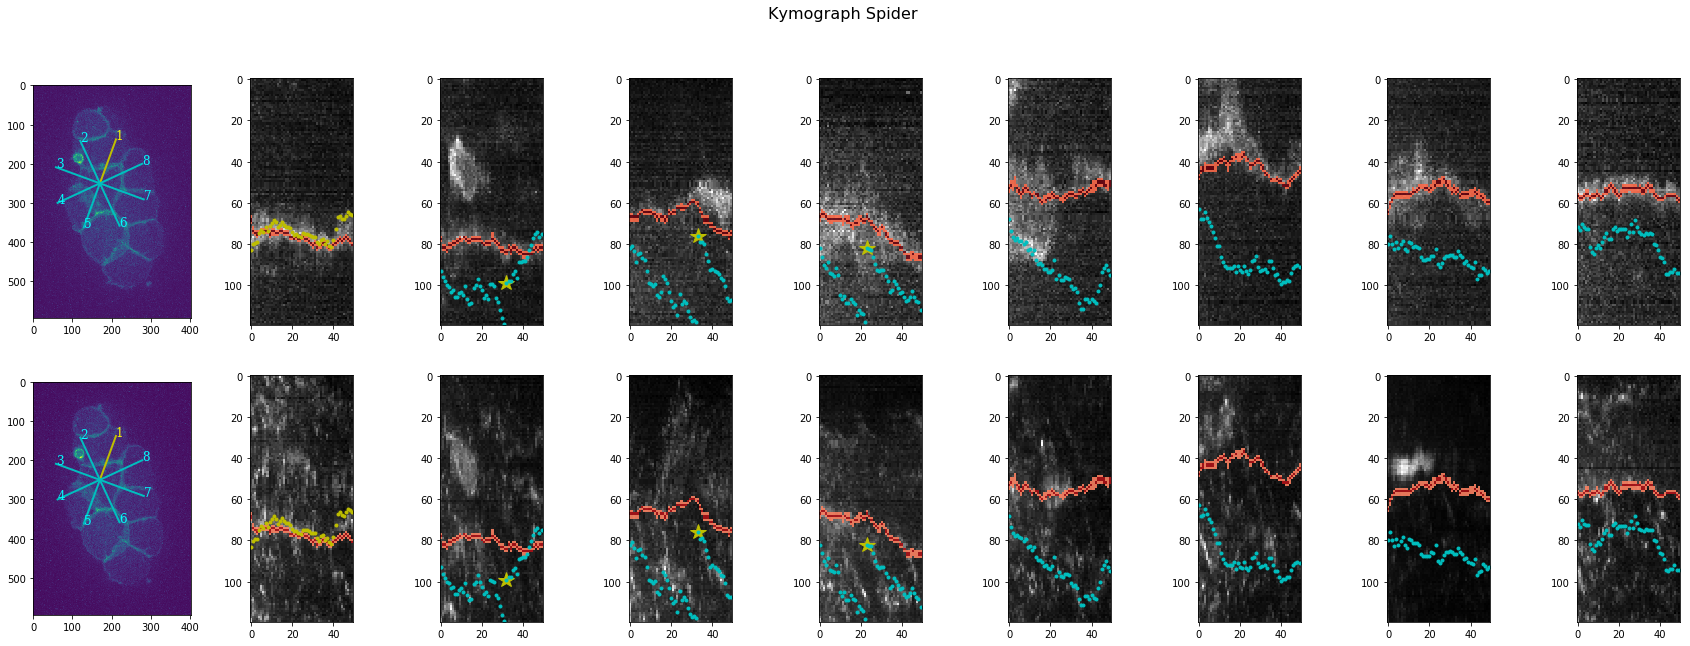

In [19]:
ks.compute(stack[1],stack[0],seg,flow)

# Plotting from here on...
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig = plt.figure()
ks.plot(fig,stack[1][0],stack[1][1],15,True)

# Use the next line if you want to save the plot to disc
#fig.savefig('/Users/jug/Desktop/muh.png')

### Plotting column flow stats

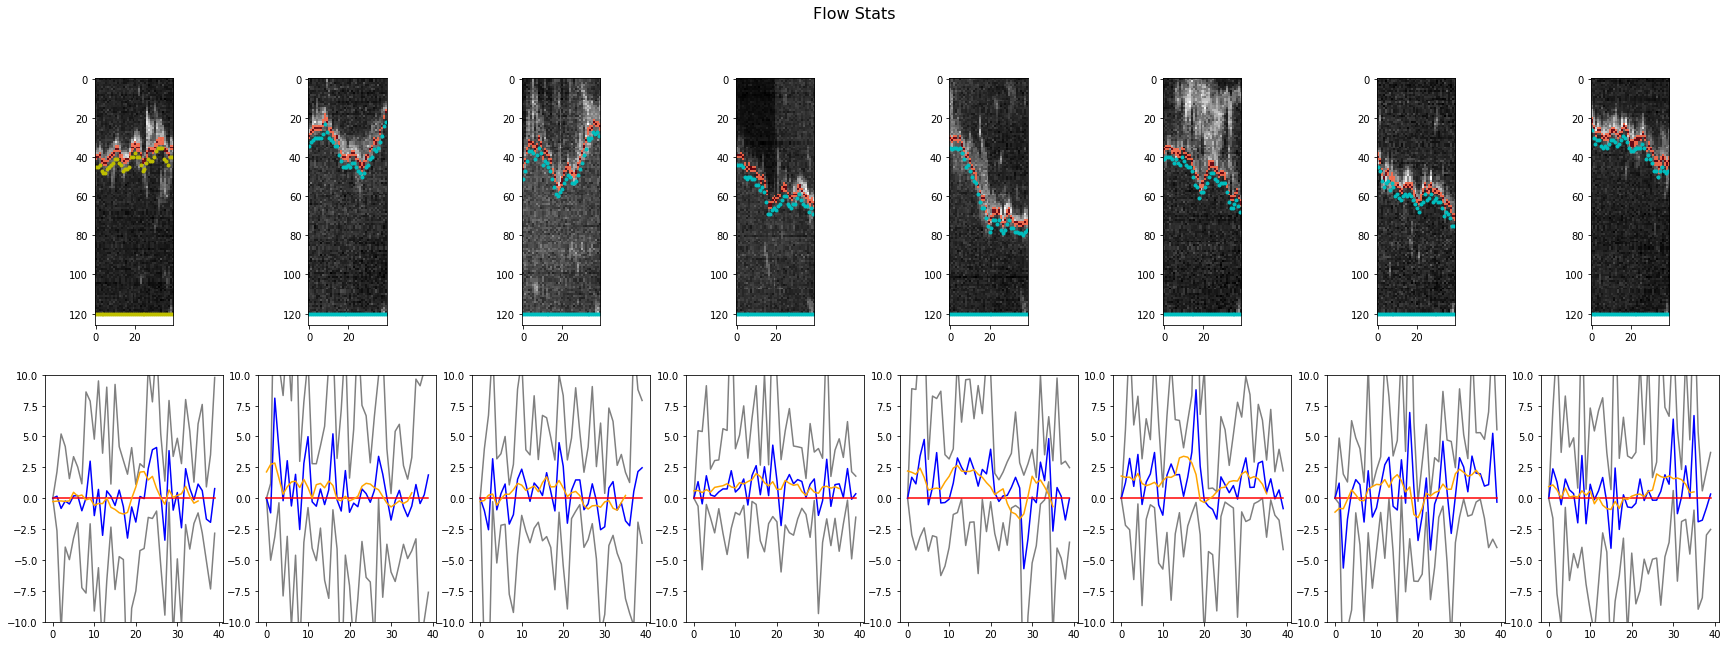

In [14]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_stats = plt.figure()
ks.plot_column_flow_stats(fig_stats, offset_from_membrane=5, length=None)

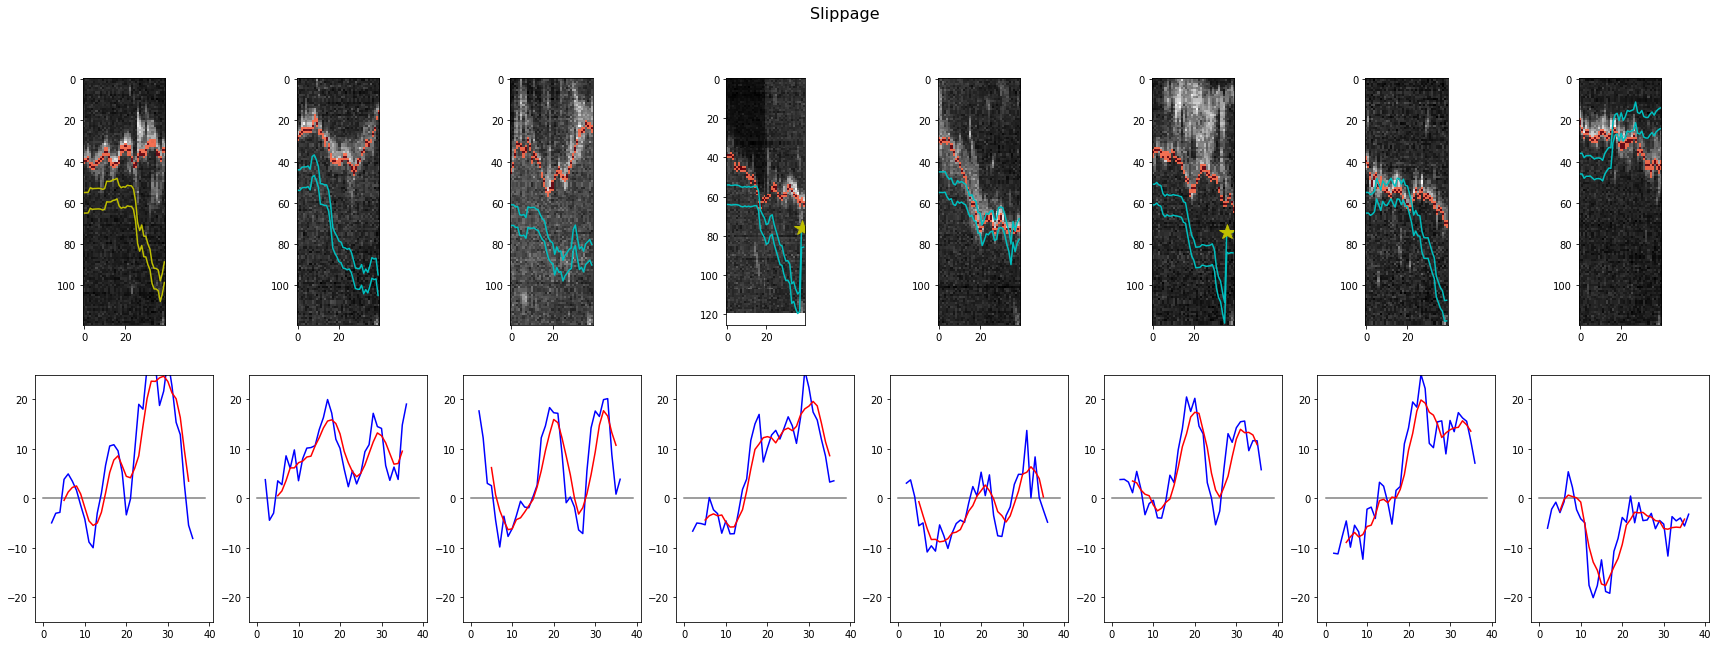

In [15]:
pylab.rcParams['figure.figsize'] = (30, 10) # set figure size
fig_slip = plt.figure()
(s, ss) = ks.plot_slippage(fig_slip, delta_t=5, offset_from_membrane=15, length=10, move_window=True, smoothing_width=5)

In [16]:
# get the y-values of the k-th legs blue line
k=0
s[k][1]

array([ -4.97649103,  -3.03829545,  -2.85556617,   3.82887462,
         4.92462327,   3.45394391,   1.60325895,  -1.39222007,
        -4.22372387,  -8.85769241, -10.01399455,  -3.01544434,
         1.04168111,   6.64981126,  10.57647014,  10.83506295,
         9.60107443,   5.24629855,  -3.36124434,  -0.14034471,
         9.37059437,  19.0088008 ,  18.03004492,  26.42266163,
        28.00272213,  26.98417127,  18.77546638,  21.66597748,
        28.0747434 ,  22.7086585 ,  15.35692904,  12.87272323,
         2.68654535,  -5.45926579,  -8.12601918])

# Export data to CSV file

In [17]:
data_filename = folder+'data.jug'
str_now = datetime.datetime.now().strftime("%B %d, %Y at %I:%M%p")

with open(data_filename, "w") as data_file:
    data_file.write("# Exported after processing from folder '%s' on %s\n\n" % (folder,str_now))
    for legnum in range(len(s)):
        data_file.write("legnum, %d\n"%legnum)
        data_file.write("x, %s\n"%s[legnum][0])
        data_file.write("y, %s\n"%s[legnum][1])